In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
data = pd.read_csv ("german_credit.csv")


In [4]:
data.shape

(1000, 21)

In [5]:
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [6]:
data.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [18]:
data.isna().sum().sum()

0

In [19]:
data.isnull().sum().sum()

0

In [14]:
# Lets build a Ensemble model but need to modify the dataset first


In [20]:
# seprating numerical col for scaling
num_col = data.select_dtypes(include='int64') 
# seprating catagorical col for understanding get_dummies 
cat_col = data.select_dtypes(include='object')
print (cat_col.shape)
cat_col1 = pd.get_dummies(cat_col)
print (cat_col1.shape)
cat_col2 = pd.get_dummies(cat_col,drop_first= True )
print (cat_col2.shape)

(1000, 13)
(1000, 54)
(1000, 41)


In [21]:
# scaling of Numerical col 
from scipy.stats import zscore
# Dropig "default" colum form num_col as its our target column 
num_col2 = num_col.drop("default" , axis=1)
num_col_scaled =pd.DataFrame( zscore(num_col2, axis = 1),columns= num_col2.columns)
num_col_scaled.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,-0.427410,2.445871,-0.432351,-0.432351,-0.276705,-0.437292,-0.439763
1,-0.391233,2.449415,-0.413369,-0.413369,-0.403744,-0.413850,-0.413850
2,-0.407466,2.448908,-0.421172,-0.419802,-0.356753,-0.422543,-0.421172
3,-0.398794,2.449437,-0.413326,-0.412599,-0.397704,-0.413689,-0.413326
4,-0.402734,2.449361,-0.415093,-0.414505,-0.385666,-0.415682,-0.415682


In [22]:
# Merging the two data frame "cat_col2" DataFarme is after droping first column after "get_dummies"
df2 = num_col_scaled.join(cat_col2)
df2.shape

(1000, 48)

In [23]:
# As df2 is equivallent to our independent varialbe checking it 
df2.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,-0.427410,2.445871,-0.432351,-0.432351,-0.276705,-0.437292,-0.439763,1,0,0,...,0,1,0,1,0,1,0,0,1,1
1,-0.391233,2.449415,-0.413369,-0.413369,-0.403744,-0.413850,-0.413850,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,-0.407466,2.448908,-0.421172,-0.419802,-0.356753,-0.422543,-0.421172,0,0,1,...,0,1,0,1,0,0,0,1,0,1
3,-0.398794,2.449437,-0.413326,-0.412599,-0.397704,-0.413689,-0.413326,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,-0.402734,2.449361,-0.415093,-0.414505,-0.385666,-0.415682,-0.415682,1,0,0,...,1,1,0,0,0,1,0,0,0,1


In [25]:
# Print Shape of model data
print ("Number of missing values " , data.isna().sum().sum())

Number of missing values  0


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [26]:
# Print Shape of model data (500, 61)
credit_df = pd.get_dummies(data)

print ("Shape of the data Frame after get_dummies",credit_df.shape)
credit_df.head()

Shape of the data Frame after get_dummies (1000, 62)


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

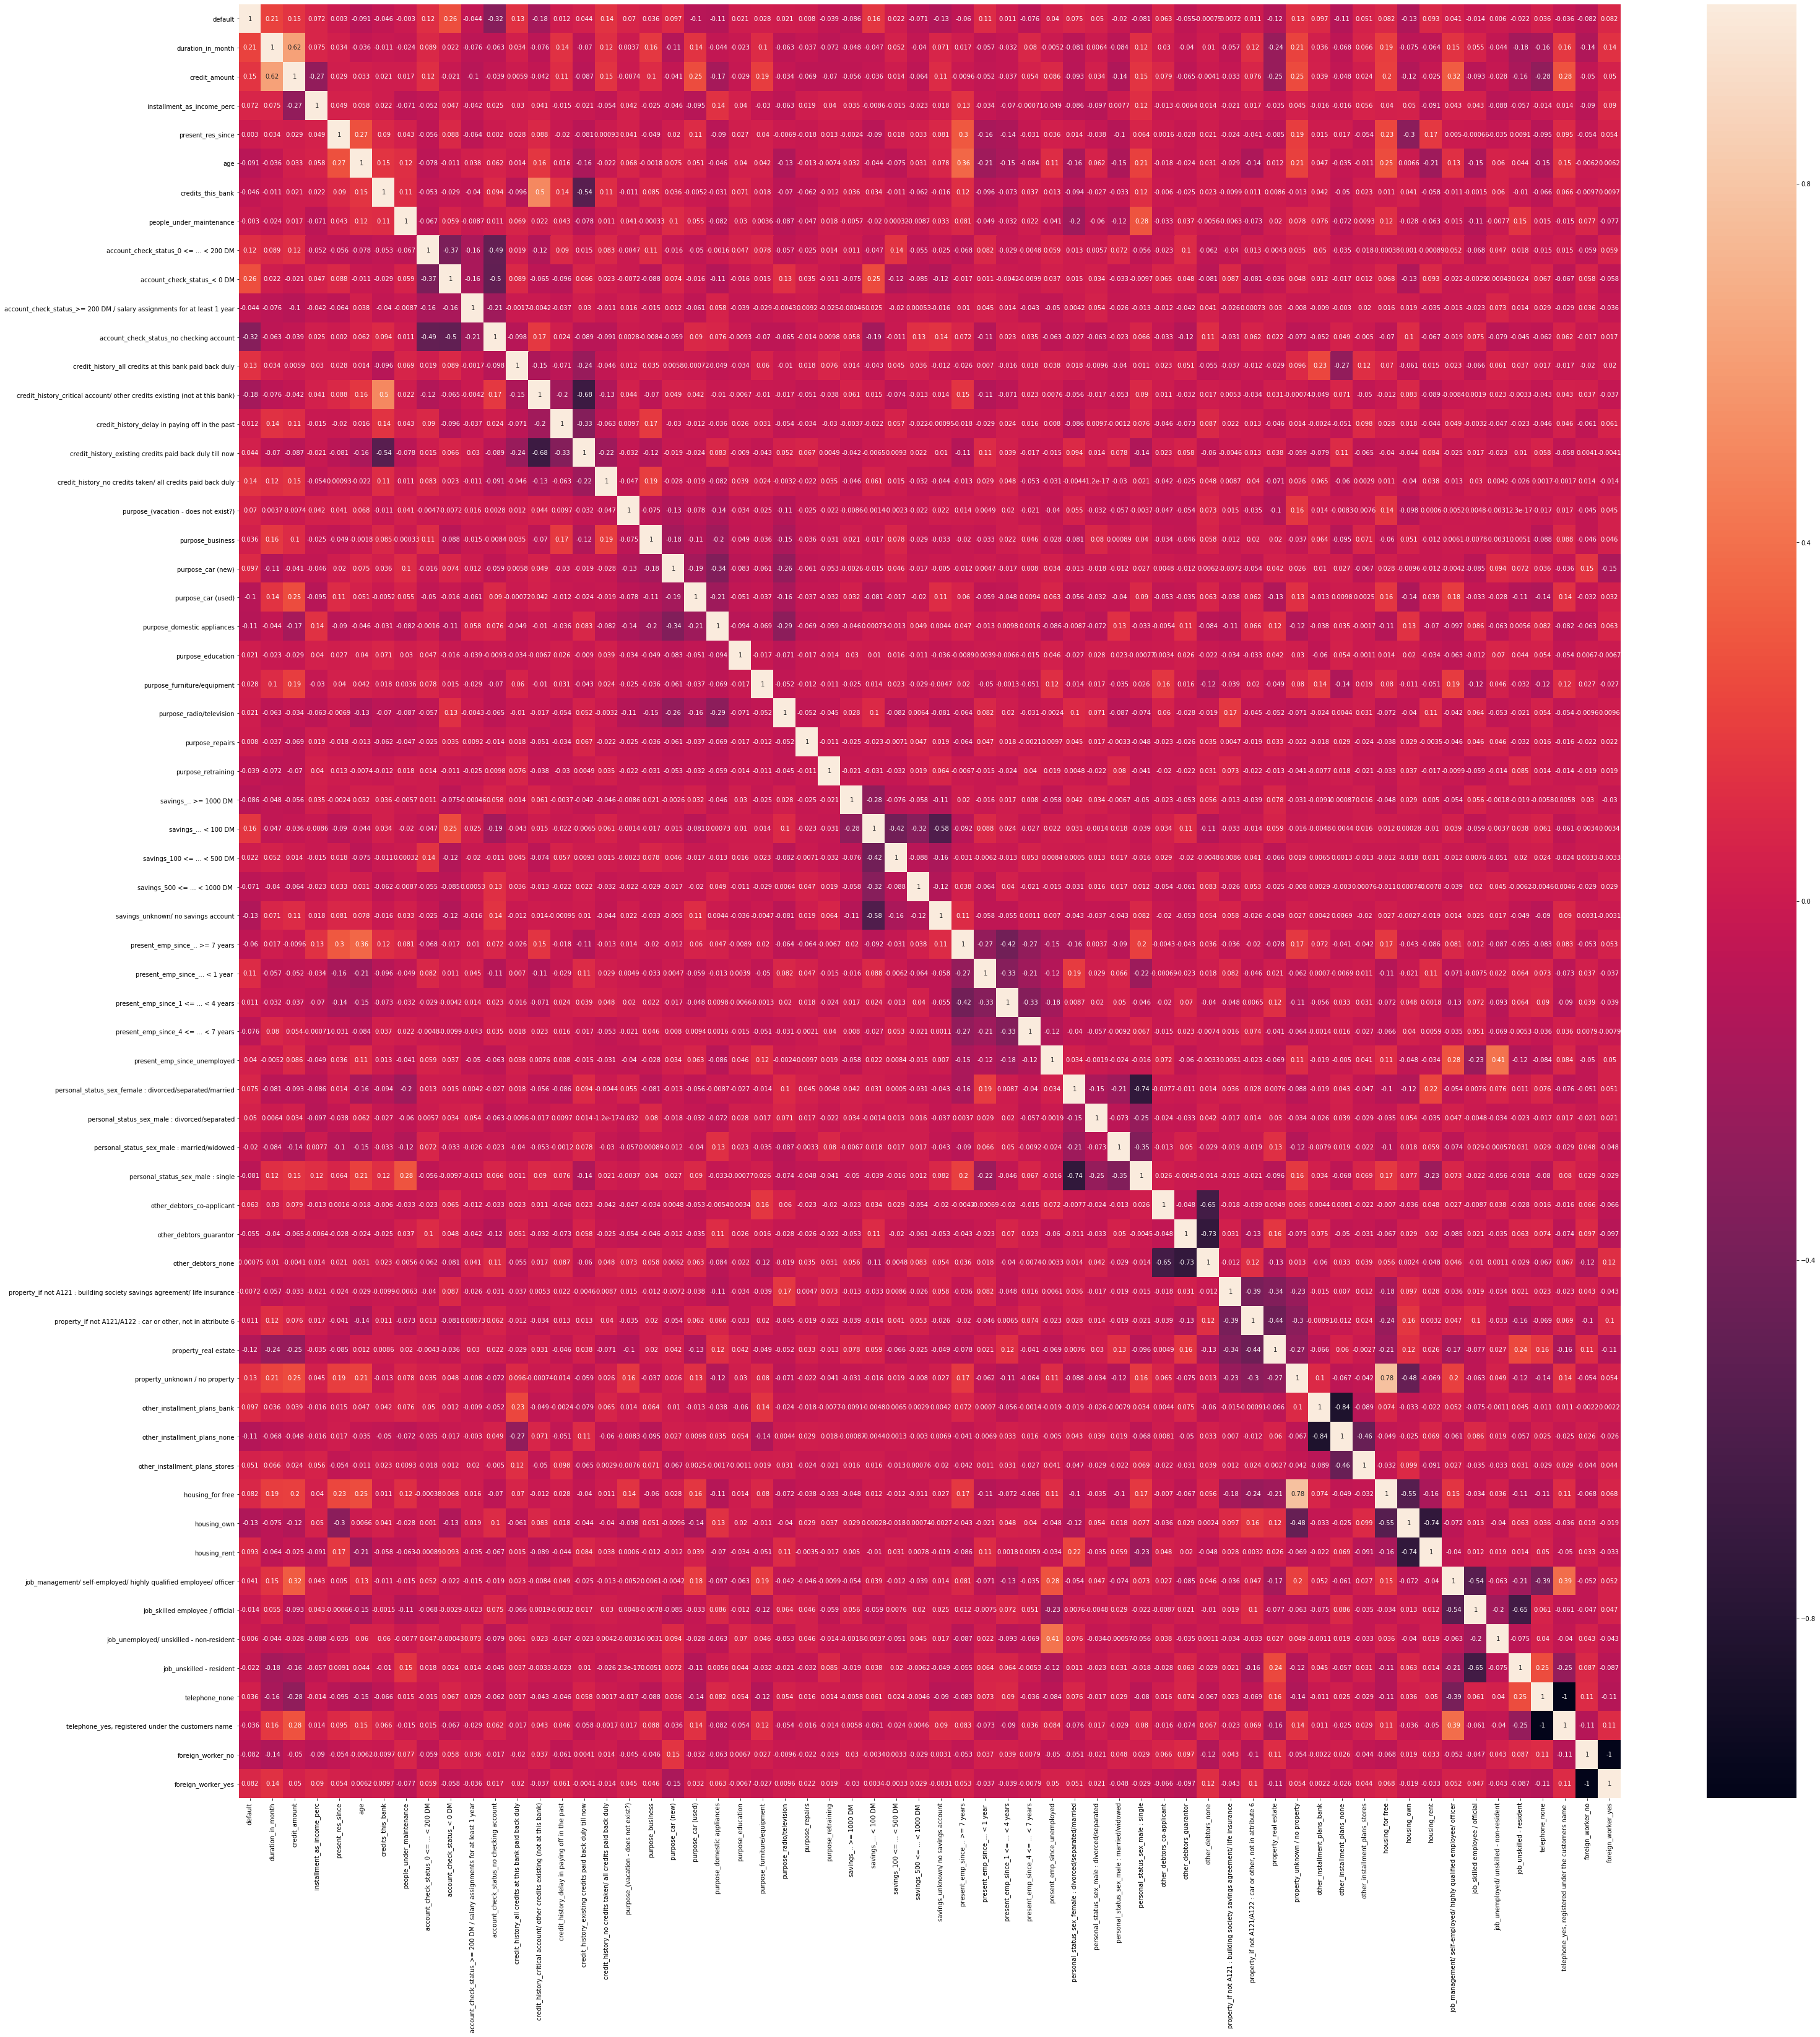

In [27]:
correlation = credit_df.corr()
f, ax = plt.subplots(figsize=(50, 50))

sns.heatmap(correlation,annot=True)
f.subplots_adjust(top=0.93)

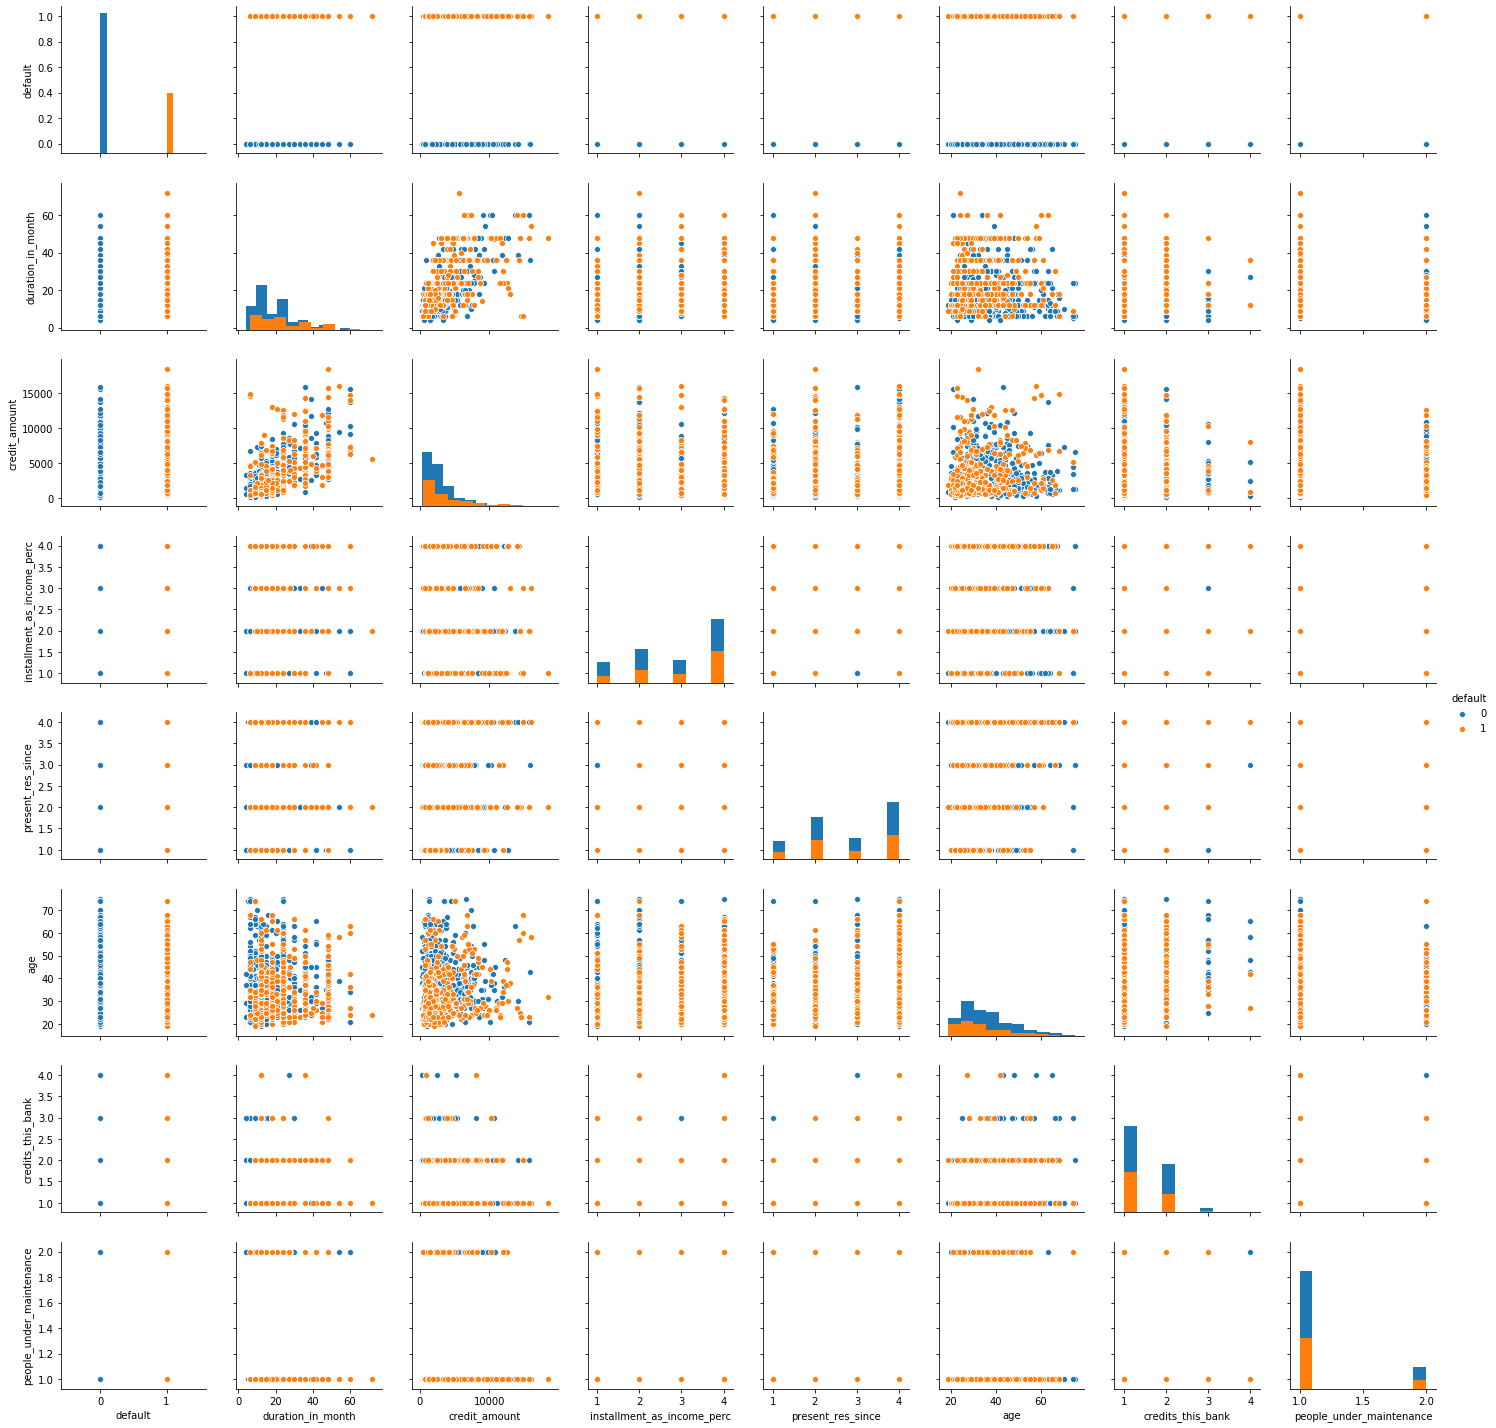

In [28]:
sns.pairplot(num_col,hue= "default",diag_kind= 'hist');

### Drop the original variables which are converted to dummy

In [29]:
df = pd.get_dummies(data, drop_first=True)
print ("Shape of our data" , df.shape) 
df.head()

Shape of our data (1000, 49)


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,0,...,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,0,1,0,1,0,0,0,1,0,1
3,0,42,7882,2,4,45,1,2,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1,24,4870,3,4,53,2,2,1,0,...,1,1,0,0,0,1,0,0,0,1


,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
default,,,,,,,,,,,,,,,,,,,,,
0,700,700,700,700,700,700,700,700,700,700,...,700,700,700,700,700,700,700,700,700,700
1,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300


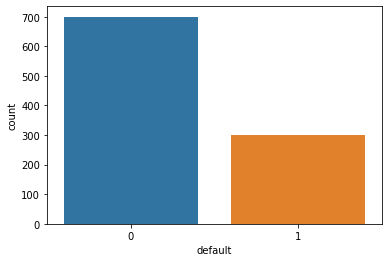

In [30]:
sns.countplot(df['default'])
df.groupby(["default"]).count()

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [31]:
from sklearn.model_selection import train_test_split
X = df2
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)
print ("X_train shape ", X_train.shape)
print ("y_train shape ", y_train.shape)
print ("X_test shape ", X_test.shape)
print ("y_test shape ", y_test.shape)

X_train shape  (750, 48)
y_train shape  (750,)
X_test shape  (250, 48)
y_test shape  (250,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier( n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train, y_train)
predictions = rfcl.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("The confussion matrix for random forest is as")
print (confusion_matrix(y_test,predictions))
print ("Accuracy for training set ",rfcl.score(X_train, y_train))
print ("Accuracy for tseting set  ",rfcl.score(X_test, y_test))
print ("Accuracy_score for tseting set  ",accuracy_score(y_test,predictions))

The confussion matrix for random forest is as
[[176   9]
 [ 34  31]]
Accuracy for training set  1.0
Accuracy for tseting set   0.828
Accuracy_score for tseting set   0.828


## By using unscaled numerical data 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X1 = df.drop('default',axis=1)
y1 = df['default']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 7)
print ("X1_train shape ", X1_train.shape)
print ("y1_train shape ", y1_train.shape)
print ("X1_test shape ", X1_test.shape)
print ("y1_test shape ", y1_test.shape)


rfcl = RandomForestClassifier( n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X1_train, y1_train)
predictions1 = rfcl.predict(X1_test)

print("The confussion matrix for random forest is as")
print (confusion_matrix(y1_test,predictions1))
print ("Accuracy for training set  using scaled numerical ",rfcl.score(X1_train, y1_train))
print ("Accuracy for tseting set  using scaled numerical ",rfcl.score(X1_test, y1_test))
print ("Accuracy_score for tseting set  using scaled numerical ",accuracy_score(y1_test,predictions1))

X1_train shape  (750, 48)
y1_train shape  (750,)
X1_test shape  (250, 48)
y1_test shape  (250,)
The confussion matrix for random forest is as
[[171  14]
 [ 37  28]]
Accuracy for training set  using scaled numerical  1.0
Accuracy for tseting set  using scaled numerical  0.796
Accuracy_score for tseting set  using scaled numerical  0.796


### Q6 Show the list of the features importance( 1 Marks)

In [38]:
from sklearn.feature_selection import SelectFromModel
feature_importances = pd.DataFrame(rfcl.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
credit_amount,0.115472
age,0.092471
duration_in_month,0.088467
account_check_status_no checking account,0.054728
installment_as_income_perc,0.041078
present_res_since,0.040964
account_check_status_< 0 DM,0.034113
other_installment_plans_none,0.022705
purpose_car (new),0.021345
savings_... < 100 DM,0.020381


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [41]:
# Use below values
num_folds = 10
seed = 77

In [42]:
#Validate the Random Forest model build above using k fold

In [43]:
myList =  list(range(10,20))
cv_scores = []
max_depth = []
for k in myList:
    dt = RandomForestClassifier(max_depth=k,random_state=seed)
    scores = cross_val_score(dt, X_train, y_train, cv=num_folds, scoring='accuracy',)
    cv_scores.append(scores.mean())
    max_depth.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of max_depth is %d" % best_k)

The optimal number of max_depth is 14


In [0]:
#Calculate Mean score

In [44]:
#Calculate Mean score
np.array(cv_scores).mean()

0.7124857752489331

In [0]:
# Calculate score standard deviation using std()

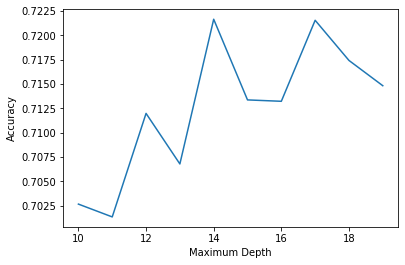

In [45]:
%matplotlib inline 
#import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(max_depth, cv_scores)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()

In [46]:
np.array(cv_scores).std()

0.006712372942477957

# Q8 Print the confusion matrix( 1 Marks)

In [47]:
from sklearn.metrics import confusion_matrix
final = RandomForestClassifier(max_depth=14, n_jobs=2,n_estimators=500,criterion="entropy",random_state=77,min_samples_leaf = 1)
final.fit(X_train,y_train)
predicted = final.predict(X_test)
print (confusion_matrix(y_test,predicted))
#final.scores(X_test,y_test)
print ('score of model with max_depth = 1 is :    ',final.score(X_test, y_test))

[[177   8]
 [ 32  33]]
score of model with max_depth = 1 is :     0.84


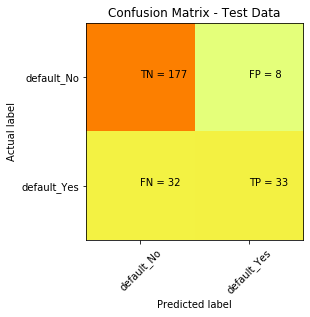

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score , recall_score
cm = confusion_matrix(y_test,predicted )
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['default_No','default_Yes']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [49]:
from sklearn.metrics import precision_score , recall_score
precision_score(y_test,predicted)

0.8048780487804879

Recall:
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized (small number of FN).

Recall is given by the relation: Tp/ Tp+Fn

Precision:
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive (small number of FP).
Precision is given by the relation: Tp/ Tp+Fp


In [50]:
recall_score(y_test,predicted)

0.5076923076923077

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [51]:
#Hint: Use roc_curve
y_pred_prob = final.predict_proba(X_test)[:, 1]

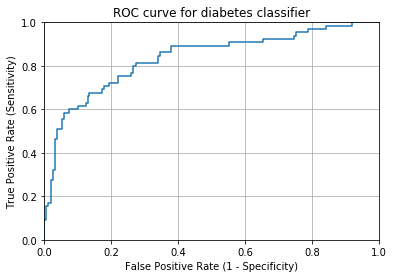

In [52]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [53]:
from sklearn import metrics
metrics.auc(fpr, tpr)

0.8347609147609147

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.8347609147609147

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [61]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [62]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [63]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.806
Standard deviation:  0.007641989269817106
